In [2]:
import os
import re
import time
import numpy as np
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

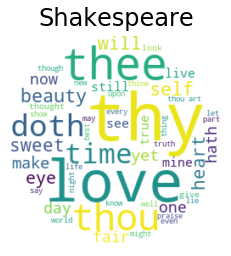

In [3]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='Shakespeare')

In [4]:
# Converting the syllable_dictionary txt file to post process words as same as the above
text2 = open(os.path.join(os.getcwd(), 'data/Syllable_dictionary.txt')).read()
# converting text to a list
lines = [line.split() for line in text2.split('\n') if line.split()]
# obs_syll finds the number of syllables for polished words by saving it as a dict file
obs_syll = {}
for line in lines:
    if len(line) == 2:
        obs_syll[re.sub(r'[^\w]', '', line[0]).lower()] = int(line[1])
    if len(line) == 3:
        obs_syll[re.sub(r'[^\w]', '', line[0]).lower()] = int(line[2])

In [5]:
obs, obs_map = parse_observations(text)
start_time = time.time()
hmm01 = unsupervised_HMM(obs, 1, 100)
hmm02 = unsupervised_HMM(obs, 2, 100)
hmm04 = unsupervised_HMM(obs, 4, 100)
hmm06 = unsupervised_HMM(obs, 6, 100)
hmm08 = unsupervised_HMM(obs, 8, 100)
hmm10 = unsupervised_HMM(obs, 10, 100)
print("--- %s seconds ---" % (time.time() - start_time))

Iteration: 0/100
Iteration: 0/100
Iteration: 0/100
Iteration: 0/100
Iteration: 0/100
Iteration: 0/100
--- 1318.5656814575195 seconds ---


In [8]:
hmm02 = unsupervised_HMM(obs, 2, 100)


Iteration: 0/100


In [7]:
hmm08 = unsupervised_HMM(obs, 8, 100)


Iteration: 0/100


In [26]:
print('Sample naive sonnet:\n=============================================================')

for i in range(14):
    name = 'sentence-%d'%(i)
    name = [sample_sonnet[10*i+j] for j in range(10)]
    print(' '.join(name).capitalize() + ',')


Sample naive sonnet:
Niggard and with sendst place they have leads times my,
Fortune and this you look not captain no oer mars,
Complexion that and things shouldst single for thy thy longer,
Lives black less true hand living happier her drooping autumn,
Two alters if are not husbands for his live thine,
Merits thy cruel call i heir which a basest of,
More chest are from all better issue and and time,
That the is eternal they hath not time madding false,
Unbless admitted of marjoram it am a bloody eyes my,
Needing doth have spirit with methinks and to to my,
Disabled wits thee played to me thine now but there,
World use i whose not alack brand me fresh more,
I winter his brow and so despite beweep there her,
Two thy tables deserved they though his still star with,


In [19]:
# we generate a sample sonnet using 140 words thinking every word is atleast a single syllable
sample_sonnet_01 = (sample_sentence(hmm01, obs_map, n_words=140))
sample_sonnet_02 = (sample_sentence(hmm02, obs_map, n_words=140))
sample_sonnet_04 = (sample_sentence(hmm04, obs_map, n_words=140))
sample_sonnet_06 = (sample_sentence(hmm06, obs_map, n_words=140))
sample_sonnet_08 = (sample_sentence(hmm08, obs_map, n_words=140))
sample_sonnet_10 = (sample_sentence(hmm10, obs_map, n_words=140))
#print(sample_sonnet)

In [20]:
print('Proper 10 syllable sonnet using 1 hidden state:\n=============================================================')
syll_count = 0
line =[]
line_count=0
syll_count_vec = np.zeros(14)
for i in range(140):
    if line_count<14:
        line.append(sample_sonnet_01[i])
        syll_count += obs_syll[sample_sonnet_01[i]]
#         print(syll_count)
        if syll_count ==10:
            print(' '.join(line).capitalize() + ',')
            line = []
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
        elif syll_count == 11:
            print(' '.join(line).capitalize() + ',')
            line=[]
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
        elif syll_count == 12:
            print(' '.join(line).capitalize() + ',')
            line=[]
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
        elif syll_count == 13:
            print(' '.join(line).capitalize() + ',')
            line=[]
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
print('\n Number of syllables in each line \n ================================= \n',syll_count_vec)
print('\n Average Number of syllables in the sonnet is \n ================================= \n',np.mean(syll_count_vec))


Proper 10 syllable sonnet using 1 hidden state:
For your that i muse to in their of defect,
Blamed done the that truth truth of today of,
Creatures you awake my wilt do such torment,
That thus to three shame removed then the my,
Feeling out not memory glory dumb,
Hath and all i a no winter not soul,
Uprear so thine how plague revenge with proof,
Whom a all when limits adoting horses,
By some and my hear from please my more leaves,
Eye seemly offences line thou that is,
And thou by to a pencil skill my up,
Large have i been stealing hell times in lack,
Tied i therefore dumb of to tempests yet,
Feeding thy all what me do but lovely,

 Number of syllables in each line 
 [11. 10. 11. 10. 10. 10. 10. 11. 10. 10. 10. 10. 10. 10.]

 Average Number of syllables in the sonnet is 
 10.214285714285714


In [21]:
print('Proper 10 syllable sonnet using 2 hidden states:\n=============================================================')
syll_count = 0
line =[]
line_count=0
syll_count_vec = np.zeros(14)
for i in range(140):
    if line_count<14:
        line.append(sample_sonnet_02[i])
        syll_count += obs_syll[sample_sonnet_02[i]]
#         print(syll_count)
        if syll_count ==10:
            print(' '.join(line).capitalize() + ',')
            line = []
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
        elif syll_count == 11:
            print(' '.join(line).capitalize() + ',')
            line=[]
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
        elif syll_count == 12:
            print(' '.join(line).capitalize() + ',')
            line=[]
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
        elif syll_count == 13:
            print(' '.join(line).capitalize() + ',')
            line=[]
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
print('\n Number of syllables in each line \n ================================= \n',syll_count_vec)
print('\n Average Number of syllables in the sonnet is \n ================================= \n',np.mean(syll_count_vec))


Proper 10 syllable sonnet using 2 hidden states:
Art a smother it to for discontent,
Abuse merit thy return glory are,
For him ten doth son of one thought no stand,
A pleasure was your whom one may of gross,
My worth rhyme your effect nurseth gusts if,
Borrowed hath that these though since hand rigour,
I finger into am steel at remain,
That and saw bitterness excuse share is,
As make travels thy then things self labouring,
Of of good his the than thought tell flies brow,
To well doth woe second give begin defence,
Fair broke to writers death example and,
Rotten make i love in better day captain,
Your summer worse of i pride of i eye,

 Number of syllables in each line 
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 11. 10. 11. 10.]

 Average Number of syllables in the sonnet is 
 10.142857142857142


In [22]:
print('Proper 10 syllable sonnet using 4 hidden states:\n=============================================================')
syll_count = 0
line =[]
line_count=0
syll_count_vec = np.zeros(14)
for i in range(140):
    if line_count<14:
        line.append(sample_sonnet_04[i])
        syll_count += obs_syll[sample_sonnet_04[i]]
#         print(syll_count)
        if syll_count ==10:
            print(' '.join(line).capitalize() + ',')
            line = []
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
        elif syll_count == 11:
            print(' '.join(line).capitalize() + ',')
            line=[]
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
        elif syll_count == 12:
            print(' '.join(line).capitalize() + ',')
            line=[]
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
        elif syll_count == 13:
            print(' '.join(line).capitalize() + ',')
            line=[]
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
print('\n Number of syllables in each line \n ================================= \n',syll_count_vec)
print('\n Average Number of syllables in the sonnet is \n ================================= \n',np.mean(syll_count_vec))


Proper 10 syllable sonnet using 4 hidden states:
Days cure my tongue did more do that that odour,
Ward before so lovely store foul to expressed,
Nature frank more that in dyers the had,
To again esteemed which proud spirit to,
Sweet spring or power i thou lions death subjects,
Task rose of the and his ills of lie confined,
In from say is one meet as away qualify,
And too thou am still my arrest in living,
Fine tendered gaze now not good put no silence,
In shame before recompense but him where,
A to deep by well earth foot with green all,
Thanks today contain and me o mine not,
More thy with built sad old to your in where,
It not that thou yet desert bitter war,

 Number of syllables in each line 
 [11. 11. 10. 10. 11. 11. 12. 11. 11. 10. 10. 10. 10. 10.]

 Average Number of syllables in the sonnet is 
 10.571428571428571


In [23]:
print('Proper 10 syllable sonnet using 6 hidden states:\n=============================================================')
syll_count = 0
line =[]
line_count=0
syll_count_vec = np.zeros(14)
for i in range(140):
    if line_count<14:
        line.append(sample_sonnet_06[i])
        syll_count += obs_syll[sample_sonnet_06[i]]
#         print(syll_count)
        if syll_count ==10:
            print(' '.join(line).capitalize() + ',')
            line = []
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
        elif syll_count == 11:
            print(' '.join(line).capitalize() + ',')
            line=[]
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
        elif syll_count == 12:
            print(' '.join(line).capitalize() + ',')
            line=[]
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
        elif syll_count == 13:
            print(' '.join(line).capitalize() + ',')
            line=[]
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
print('\n Number of syllables in each line \n ================================= \n',syll_count_vec)
print('\n Average Number of syllables in the sonnet is \n ================================= \n',np.mean(syll_count_vec))


Proper 10 syllable sonnet using 6 hidden states:
Chose thy ages ill hair mar my chide duty,
Present thousand mind will a female and,
Eyes that the it and hate and of draw and,
Of return keep thy could see my thee if,
In first though like in replete take of a,
Slander though him my abuses heart unused,
Than eternity good and new i lies,
Away thee sometime pitch beautys strange it,
Time that hearts true deeds but appetite and,
That as his breath hath that allayed thou great,
Day drink of another grieve old think the,
All critic thy with slave is to thy time,
In of sight own canst best heart to miles praise,
Thou oer rose sweet prescriptions truth a friend,

 Number of syllables in each line 
 [11. 10. 10. 10. 10. 12. 10. 10. 10. 10. 10. 10. 10. 10.]

 Average Number of syllables in the sonnet is 
 10.214285714285714


In [24]:
print('Proper 10 syllable sonnet using 8 hidden states:\n=============================================================')
syll_count = 0
line =[]
line_count=0
syll_count_vec = np.zeros(14)
for i in range(140):
    if line_count<14:
        line.append(sample_sonnet_08[i])
        syll_count += obs_syll[sample_sonnet_08[i]]
#         print(syll_count)
        if syll_count ==10:
            print(' '.join(line).capitalize() + ',')
            line = []
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
        elif syll_count == 11:
            print(' '.join(line).capitalize() + ',')
            line=[]
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
        elif syll_count == 12:
            print(' '.join(line).capitalize() + ',')
            line=[]
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
        elif syll_count == 13:
            print(' '.join(line).capitalize() + ',')
            line=[]
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
print('\nNumber of syllables in each line \n ================================= \n',syll_count_vec)
print('\nAverage Number of syllables in the sonnet is \n ================================= \n',np.mean(syll_count_vec))


Proper 10 syllable sonnet using 8 hidden states:
When my too than and so careful to most,
In forgot i being in to wonder,
To have maladies remain as doth supposed,
Meet hot if still body warm lest methinks,
Steeled be removed shows print me for enlarged,
Lends razed therein loves night for cast believe,
View the please most forward blood by his the,
Alien gains things your fire of one my gladly,
Touches sad behold this attend many,
Side who as so i love plea mortal times,
Words for unkindness wherethrough with next praise,
Is yet not one missed times i to eye of,
Hearsay time you confined hearsay to hear,
For dross bodys thy from proud with pry eyes,

Number of syllables in each line 
 [10. 10. 12. 10. 10. 11. 10. 11. 10. 10. 10. 10. 10. 10.]

Average Number of syllables in the sonnet is 
 10.285714285714286


In [25]:
print('Proper 10 syllable sonnet using 10 hidden states:\n=============================================================')
syll_count = 0
line =[]
line_count=0
syll_count_vec = np.zeros(14)
for i in range(140):
    if line_count<14:
        line.append(sample_sonnet_10[i])
        syll_count += obs_syll[sample_sonnet_10[i]]
#         print(syll_count)
        if syll_count ==10:
            print(' '.join(line).capitalize() + ',')
            line = []
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
        elif syll_count == 11:
            print(' '.join(line).capitalize() + ',')
            line=[]
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
        elif syll_count == 12:
            print(' '.join(line).capitalize() + ',')
            line=[]
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
        elif syll_count == 13:
            print(' '.join(line).capitalize() + ',')
            line=[]
            syll_count_vec[line_count] = syll_count
            syll_count=0
            line_count+=1
print('\n Number of syllables in each line \n ================================= \n',syll_count_vec)
print('\n Average Number of syllables in the sonnet is \n ================================= \n',np.mean(syll_count_vec))


Proper 10 syllable sonnet using 10 hidden states:
And to better my fashion is this alas,
Natures fury aught suborned in slave turn,
Yet impediments seldom spirit you,
Thee love thy i to the against so fairer,
Directly wit foe minds creation still,
Is away a for at woe smother my,
Jade than by days in that swift a had my,
Woe think i bore filled they surly scythe when,
The grieve once this of each cure bear thou made,
Saw in i rich hand shall but got the absence,
To tell lips thy selfkilled with not delight,
But rest three seem favour but evermore,
Thee deface of being to seen is a,
Willing alone all to the receivst my,

 Number of syllables in each line 
 [11. 10. 10. 11. 10. 10. 10. 10. 10. 11. 10. 10. 10. 10.]

 Average Number of syllables in the sonnet is 
 10.214285714285714
